In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
appearances = pd.read_csv('baseballdatabank-2022.2/core/Appearances.csv')
batting = pd.read_csv('baseballdatabank-2022.2/core/Batting.csv')
people = pd.read_csv('baseballdatabank-2022.2/core/People.csv')
pitching = pd.read_csv('baseballdatabank-2022.2/core/Pitching.csv')
teams = pd.read_csv('baseballdatabank-2022.2/core/Teams.csv')

In [3]:
bat_16_20 = batting[batting['yearID'] >= 2016]
bat_16_20 = bat_16_20[bat_16_20['yearID'] < 2021]
bat_21 = batting[batting['yearID'] == 2021]

pit_16_20 = pitching[pitching['yearID'] >= 2016]
pit_16_20 = pit_16_20[pit_16_20['yearID'] < 2021]
pit_21 = pitching[pitching['yearID'] == 2021]

In [13]:
bat_21.head(10)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
108789,abadfe01,2021,1,BAL,AL,16,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108790,abbotco01,2021,1,CHN,NL,8,3,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
108791,abreual01,2021,1,NYA,AL,28,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108792,abreubr01,2021,1,HOU,AL,31,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108793,abreujo02,2021,1,CHA,AL,152,566,86,148,30,...,117.0,1.0,0.0,61,143.0,3.0,22.0,0.0,10.0,28.0
108794,acevedo01,2021,1,OAK,AL,10,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108795,acunaro01,2021,1,ATL,NL,82,297,72,84,19,...,52.0,17.0,6.0,49,85.0,2.0,9.0,0.0,5.0,0.0
108796,adamewi01,2021,1,TBA,AL,41,132,16,26,6,...,15.0,1.0,2.0,10,51.0,0.0,0.0,0.0,0.0,1.0
108797,adamewi01,2021,2,MIL,NL,99,365,61,104,26,...,58.0,4.0,2.0,47,105.0,1.0,0.0,0.0,1.0,8.0
108798,adamja01,2021,1,CHN,NL,12,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
bat_21.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [16]:
pit_21.head(10)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
48399,abadfe01,2021,1,BAL,AL,0,0,16,0,0,...,1.0,0,0.0,0,82.0,4,12,0.0,0.0,3.0
48400,abbotco01,2021,1,CHN,NL,0,0,7,1,0,...,0.0,2,0.0,0,82.0,2,15,1.0,0.0,0.0
48401,abreual01,2021,1,NYA,AL,2,0,28,0,0,...,1.0,3,3.0,1,156.0,14,21,0.0,3.0,3.0
48402,abreubr01,2021,1,HOU,AL,3,3,31,0,0,...,0.0,4,3.0,0,161.0,3,26,0.0,2.0,4.0
48403,acevedo01,2021,1,OAK,AL,0,0,10,0,0,...,0.0,0,0.0,0,44.0,7,4,0.0,0.0,0.0
48404,adamja01,2021,1,CHN,NL,1,0,12,0,0,...,0.0,0,3.0,0,50.0,4,7,0.0,0.0,0.0
48405,adamsau02,2021,1,SDN,NL,3,2,65,0,0,...,2.0,4,24.0,0,241.0,18,28,3.0,3.0,4.0
48406,adonjo01,2021,1,WAS,NL,0,0,1,1,0,...,0.0,1,1.0,0,24.0,0,2,0.0,0.0,1.0
48407,aguilmi01,2021,1,ARI,NL,1,1,9,0,0,...,1.0,0,0.0,0,29.0,2,6,1.0,0.0,1.0
48408,akinke01,2021,1,BAL,AL,2,10,24,17,0,...,1.0,5,2.0,1,427.0,1,70,1.0,5.0,7.0


In [18]:
bat_21.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [4]:
bat_21['AVG'] = bat_21['H']/bat_21['AB']
bat_21['OBP'] = (bat_21['H']+bat_21['BB']+bat_21['IBB'])/(bat_21['AB']+bat_21['BB']+bat_21['IBB']+bat_21['SH']+bat_21['SF']+bat_21['GIDP'])

/var/folders/j9/rbvh7z7s2rd6y78tqg6yv2300000gn/T/ipykernel_99000/699961556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bat_21['AVG'] = bat_21['H']/bat_21['AB']
/var/folders/j9/rbvh7z7s2rd6y78tqg6yv2300000gn/T/ipykernel_99000/699961556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bat_21['OBP'] = (bat_21['H']+bat_21['BB']+bat_21['IBB'])/(bat_21['AB']+bat_21['BB']+bat_21['IBB']+bat_21['SH']+bat_21['SF']+bat_21['GIDP'])


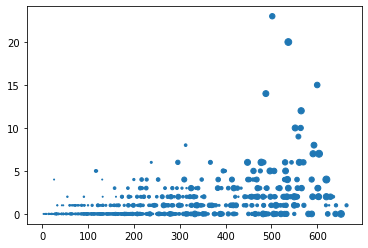

In [5]:
plt.scatter(x=bat_21['AB'], y=bat_21['IBB'],s=bat_21['HR'])

KeyError: 0

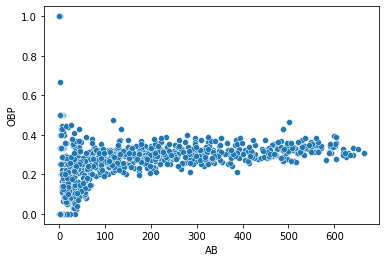

In [33]:
sns.scatterplot(data=bat_21,x='AB',y='OBP')
for i in range(bat_21.shape[0]):
 plt.text(x=bat_21.AB[i],y=bat_21.OBP[i],s=bat_21.playerID[i], 
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

In [49]:
avg_bat_16_20 = bat_16_20.drop('yearID', axis=1)
avg_bat_16_20_wname = avg_bat_16_20.merge(right=people, how='left', on='playerID')
avg_bat_16_20_wname = avg_bat_16_20_wname.groupby('playerID')
#avg_bat_16_20_wname = avg_bat_16_20.merge(on=people, lkey='playerID', rkey='playerID')

In [50]:
avg_bat_16_20_wname.head(10)

,playerID,stint,teamID,lgID,G,AB,R,H,2B,3B,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,abadfe01,1,MIN,AL,39,1,0,0,0,0,...,Abad,Fernando Antonio,235.0,74.0,L,L,2010-07-28,2021-10-01,abadf001,abadfe01
1,abadfe01,2,BOS,AL,18,0,0,0,0,0,...,Abad,Fernando Antonio,235.0,74.0,L,L,2010-07-28,2021-10-01,abadf001,abadfe01
2,abreujo02,1,CHA,AL,159,624,67,183,32,1,...,Abreu,Jose Dariel,235.0,75.0,R,R,2014-03-31,2021-10-02,abrej003,abreujo02
3,achteaj01,1,LAA,AL,27,0,0,0,0,0,...,Achter,Adam Joseph,215.0,77.0,R,R,2014-09-03,2016-10-01,achta001,achteaj01
4,ackledu01,1,NYA,AL,28,61,6,9,0,0,...,Ackley,Dustin Michael,205.0,73.0,L,R,2011-06-17,2016-05-29,ackld001,ackledu01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7436,zimmebr02,1,BAL,AL,2,0,0,0,0,0,...,Zimmermann,Bruce Anthony,215.0,73.0,L,L,2020-09-17,2021-10-03,zimmb002,zimmebr02
7437,zimmejo02,1,DET,AL,3,0,0,0,0,0,...,Zimmermann,Jordan M.,225.0,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02
7438,zimmeky01,1,KCA,AL,16,0,0,0,0,0,...,Zimmer,Kyle Joseph,225.0,75.0,R,R,2019-03-31,2021-10-02,zimmk001,zimmeky01
7439,zuberty01,1,KCA,AL,23,0,0,0,0,0,...,Zuber,John Tyler,175.0,71.0,R,R,2020-07-24,2021-09-30,zubet001,zuberty01


In [ ]:
avg_bat_16_20_wname